# MSDS696 Project II: Object Detection in Home Video Sercurity Systems¶
# Testing YOLOv2 Model

## Natalia Weakly

In [1]:
#Imports
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

# Before running this cell:
# Substitute path in the code below to the Darkflow master folder path on the local machine
sys.path.insert(0, r'C:\Users\NataliaWeakly\darkflow\darkflow')

from darkflow.net.build import TFNet

In [1]:
import os
os.getcwd() # check current active directory

In [4]:
# Before running this cell:
# change the current working directory to the Darkflow master folder if necessary
os.chdir('C:\\Users\\NataliaWeakly\\darkflow\\darkflow') 

In [11]:
#dictionary to specify the model
#note: Using full YOLOv2 model
options= {
    'model': 'cfg/yolov2.cfg', #configuration file
    'load': 'bin/yolov2.weights', # pre-trained model weights
    'threshold': 0.3,  # detection confidence threshold 30%
    'gpu': 1.0  #run 100% on GPU
}
tfnet=TFNet(options) # instantiate

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.05699968338012695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

In [24]:
# Let's test the model on a static picture
img=cv2.imread('IMG_0114.jpg', cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result=tfnet.return_predict(img)
result

[{'label': 'cat',
  'confidence': 0.6840727,
  'topleft': {'x': 61, 'y': 43},
  'bottomright': {'x': 599, 'y': 442}}]

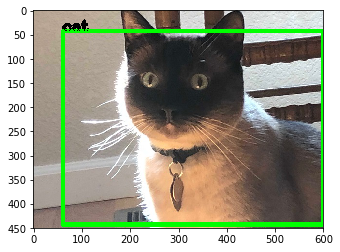

In [28]:
#Draw a bounding box and label the predicted class
tl0=(result[0]['topleft']['x'], result[0]['topleft']['y'])
br0=(result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label0=result[0]['label']

img=cv2.rectangle(img, tl0, br0, (0,255,0), 7)
img=cv2.putText(img, label0, tl0, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1)
plt.imshow(img)
plt.show()
